Banana


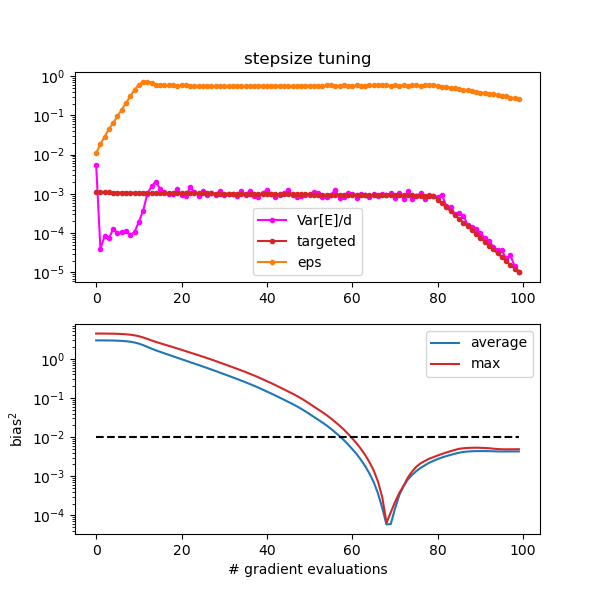

ICG


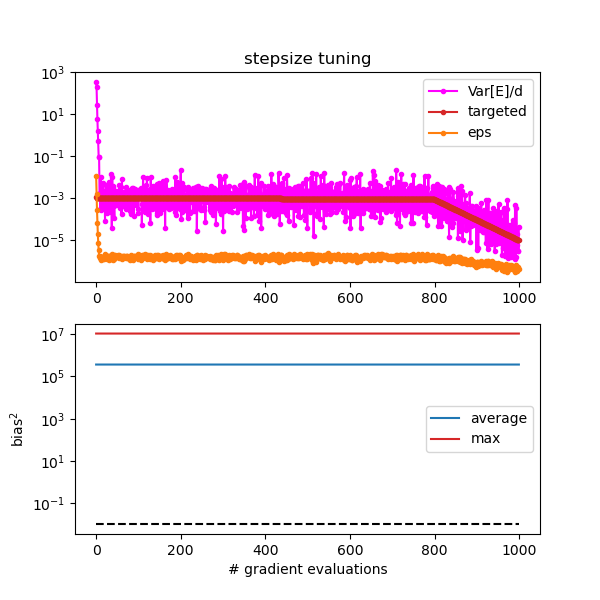

german_credit


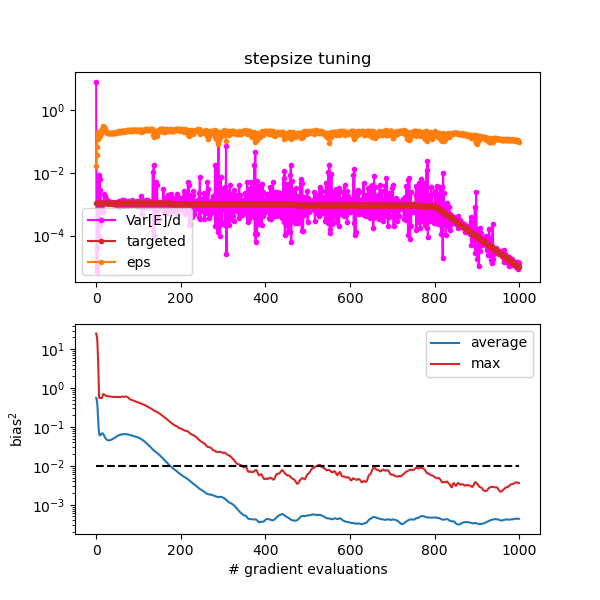

brownian


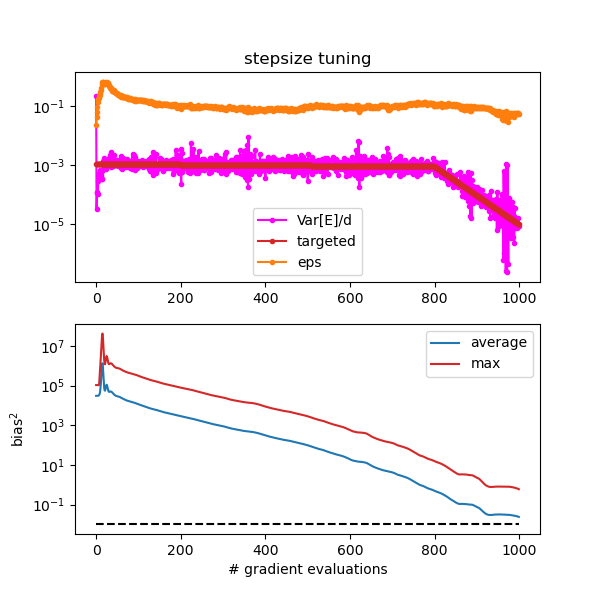

IRT


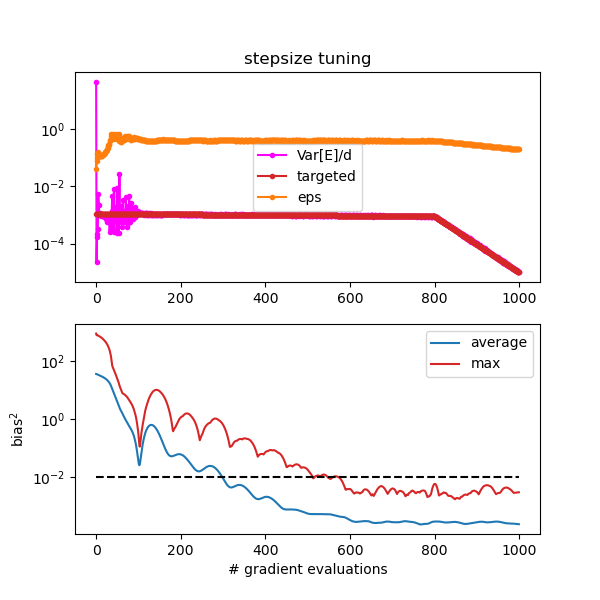

SV


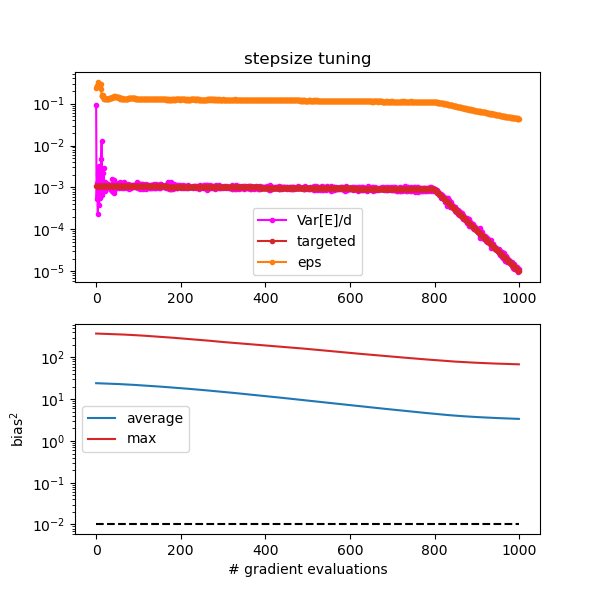

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display


targets = ['Banana', 'ICG', 'german_credit', 'brownian', 'IRT', 'SV']

for i in [0, 1, 2, 3, 4, 5]:
    name = targets[i]
    print(name)
    display(Image(filename='plots/tst_ensamble/'+name+'.png'))

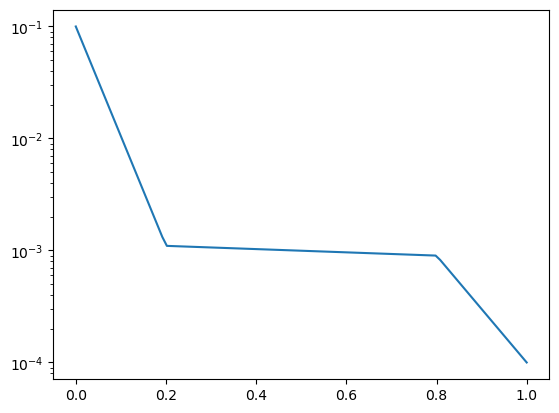

In [43]:


class Program:
    
    def __init__(self):
        
        #fraction of the total sampling time
        self.t = np.array([-1e-10, 1./5., 4./5., 1. + 1e-10]) 
        
        #log Var[E]/d that we want at the specified times. Other values will be interpolated by the exponential.
        self.m = np.log(np.array([1e-1, 1.1e-3, 0.9e-3, 1e-4]))

        self.a, self.b = self.get_coeffs(self.t, self.m)
        self.ainv, self.binv = self.get_coeffs(self.m, self.t)


    def get_coeffs(self, x, y):
        """coefficients of the linear interpolation"""
        slope = (y[:-1] - y[1:]) / (x[:-1] - x[1:])
        intercept = (-y[:-1]*x[1:] + y[1:] * x[:-1]) / (x[:-1] - x[1:])
        return slope, intercept


    def vare(self, s):
        """gets the desired Var[E]/d at: number_of_steps = s * total_number_of_steps"""
        select = np.searchsorted(self.t, s) - 1
        return np.exp(self.a[select] * s + self.b[select])

    def inv_vare(self, m):
        """inverse of the above function"""
        select = np.searchsorted(self.m[::-1], np.log(m))
        return self.ainv[-select] * np.log(m) + self.binv[-select]


program = Program()
s = np.linspace(0, 1, 100)
plt.plot(s, [program.vare(ss) for ss in s])
#plt.plot(program.t, np.exp(program.m), 'o')
plt.yscale("log")
plt.show()